### Main Goal

Customer reviews in open comments are informative for the buyers to check out the quality of the products.
However, human cannot digest the verbaim straight forward. Particulary, there are thousands of comments.
Thus, the aim of this interactive customer review NLP analysis is to reduce the burden of verbatim exploration.

Customers can directly find the topics among verbatim from this method. Afterwards, Customers can select topics that are relevant to their concerns by searching based on desired keywords. Furthermore, sentiment analysis and customer friendly statistic visualization will explicitively show to help customer's decision making for final purchase. 



In [1]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

import warnings
warnings.filterwarnings('ignore')

# !pip install 'top2vec[sentence_transformers]'

# !pip install top2vec
# !pip install seaborn datashader bokeh holoviews
# !pip install --pre umap-learn
# !pip install top2vec[sentence_encoders]

# voila refer: https://pythonforundergradengineers.com/deploy-jupyter-notebook-voila-heroku.html
# voila movable layout: https://blog.jupyter.org/voila-gridstack-template-8a431c2b353e

# parsing data from AMAZON

from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# # ----- Example Python program to create a database in PostgreSQL using Psycopg2 -----

# # import the PostgreSQL client for Python

# import psycopg2

# from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# # Connect to PostgreSQL DBMS
# con = psycopg2.connect(dbname='reviews', user='postgres', password='Wsxc5415', host='localhost', port='5432');
# con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);

# # Obtain a DB Cursor
# cursor          = con.cursor();

# # Create table statement
# sql = "select * from google_reviews"

# # Create a table in PostgreSQL database
# cursor.execute(sql)

# data = cursor.fetchall()

# cols = []
# for d in cursor.description:
#     cols.append(d[0])

In [3]:
# read data
# metadata_df = pd.DataFrame(data=data, columns=cols)

# search = 'Pinakothek der Moderne'
search = 'Ya The Mandarin Room'
# search = 'SEEN RESTAURANT'

search = '+'.join(search.split(' '))

# metadata_df = metadata_df[metadata_df['search']==f'{search}']
metadata_df = pd.read_csv(f'{search}.csv')

metadata_df = metadata_df.rename(columns={"Review Text": "content", "Review Rate": "rating"})

metadata_df = metadata_df.dropna(subset='content')

metadata_df['rating'] = metadata_df['rating'].astype('float32')
metadata_df['content'] = metadata_df['content'].str.split('(Übersetzt von Google)').str[-1]
metadata_df['content'] = metadata_df['content'].str.split('(Original)').str[0]
metadata_df['content'] = metadata_df['content'].str.replace('(','')
metadata_df['content'] = metadata_df['content'].str.replace(')','')

metadata_df = metadata_df.reset_index(drop=True)

# metadata_df.style.set_properties(**{'width': '300px'})

In [4]:
# Train Top2Vec Model
# Parameters:
#   * ``documents``: Input corpus, should be a list of strings.
  
#   * ``speed``: This parameter will determine how fast the model takes to train. 
#     The 'fast-learn' option is the fastest and will generate the lowest quality
#     vectors. The 'learn' option will learn better quality vectors but take a longer
#     time to train. The 'deep-learn' option will learn the best quality vectors but 
#     will take significant time to train.  
    
#   * ``workers``: The amount of worker threads to be used in training the model. Larger
#     amount will lead to faster training.
    
# See [Documentation](https://top2vec.readthedocs.io/en/latest/README.html).

# top2vec = Top2Vec(documents=metadata_df.content.to_list(), speed="learn", workers=4)
# top2vec = Top2Vec(documents = metadata_df.content.to_list(), min_count = 2, 
#                   embedding_model='distiluse-base-multilingual-cased')

# top2vec = ''
# import data
search = '+'.join(search.split(' '))

metadata_df = metadata_df[metadata_df['search']==f'{search}']
# display(metadata_df.head(), layout=widget_layout)

top2vec = Top2Vec(documents = metadata_df.content.to_list(), min_count = 2, 
              embedding_model='distiluse-base-multilingual-cased')
    
# top2vec = Top2Vec.load("../input/covid19top2vec/covid19_deep_learn_top2vec")

2022-06-26 11:48:06,730 - top2vec - INFO - Pre-processing documents for training
2022-06-26 11:48:06,753 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2022-06-26 11:48:17,298 - top2vec - INFO - Creating joint document/word embedding
2022-06-26 11:48:22,404 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-06-26 11:48:25,291 - top2vec - INFO - Finding dense areas of documents
2022-06-26 11:48:25,296 - top2vec - INFO - Finding topics


In [5]:
def show_url(*args):
    global top2vec, metadata_df, search

    with out_df:
        clear_output()

        # import data
        search = '+'.join(search.split(' '))

        metadata_df = metadata_df[metadata_df['search']==f'{search}']
        display(metadata_df.head())

#         top2vec = Top2Vec(documents = metadata_df.content.to_list(), min_count = 2, 
#                       embedding_model='distiluse-base-multilingual-cased')
    
    return metadata_df


widget_layout = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='100%')

url=search

selected_text = widgets.Textarea(value=f"{url}", layout=widget_layout)

display(selected_text)
show_url_btn = widgets.Button(description="scrape reviews")
display(show_url_btn)
show_url_btn.on_click(show_url)

out_df = widgets.Output()
display(out_df)


Textarea(value='Ya+The+Mandarin+Room', layout=Layout(align_items='center', display='flex', flex_flow='column',…

Button(description='scrape reviews', style=ButtonStyle())

Output()

In [6]:
# import umap
import umap.umap_ as umap
# import umap.plot as plot

# Where umap_args is what you passed into the Top2Vec constructor
umap_args = {
    "n_neighbors": 15,
    "n_components": 2, # 5 -> 2 for plotting 
    "metric": "cosine",
}

umap_args_for_plot = umap_args.copy()
umap_args_for_plot.update({'n_components': 2,})

In [7]:
import plotly.graph_objects as go

doc_embedding = umap.UMAP(**umap_args_for_plot).fit_transform(top2vec.document_vectors)

df_c = pd.DataFrame()
df_c['x'] = doc_embedding[:, 0]
df_c['y'] = doc_embedding[:, 1]
df_c['content'] = metadata_df.loc[:, 'content'].reset_index(drop=True)
# df_c['type_labels'] = type_labels
df_c['Topic'] = top2vec.doc_top
df_c['Topic'] = df_c['Topic'].astype('category')
df_c['Rating'] = metadata_df.loc[:, 'rating'].reset_index(drop=True)

# x and y given as array_like objects
import plotly.express as px

fig = px.scatter(df_c, x='x', y='y', 
                 color='Topic', hover_data=['content'])

x=[df_c[df_c['Topic']==i]['x'].mean() for i in range(len(top2vec.topic_vectors))]
y=[df_c[df_c['Topic']==i]['y'].mean() for i in range(len(top2vec.topic_vectors))]
text=[f"{i}: {'|'.join(top2vec.topic_words[i][:3])}" for i in range(len(top2vec.topic_vectors))]
    
for i in range(top2vec.get_num_topics()):
    fig.add_annotation(
        x=x[i],
        y=y[i],
        text=text[i],
        showarrow=True,
        font=dict(
            family="sans serif",
            size=12,
            color="Red"
        ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor='white',
        opacity=0.8
    )

#x axis
fig.update_xaxes(visible=False)

#y axis    
fig.update_yaxes(visible=False)

# https://medium.datadriveninvestor.com/voil%C3%A0-everything-you-need-to-know-4c6098f0f218
player_select_widget_container_layout = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='100%')

# display(fig,
#         layout=player_select_widget_container_layout)

In [8]:
topic_df = df_c.groupby('Topic').mean()
topic_df['Topic_words'] = text

fig_bar = px.bar(topic_df, x='Topic_words', y='Rating', range_y=[3,5])

#x axis
# fig_bar.update_xaxes(visible=False)

# https://medium.datadriveninvestor.com/voil%C3%A0-everything-you-need-to-know-4c6098f0f218
player_select_widget_container_layout = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='100%')

# display(fig_bar,
#         layout=player_select_widget_container_layout)

In [9]:
widgets.HBox(
    [go.FigureWidget(fig, layout=player_select_widget_container_layout), 
     go.FigureWidget(fig_bar, layout=player_select_widget_container_layout)],
    layout=widgets.Layout(max_width='100%', margin='0 auto 0 auto')
)

    'data': [{'customdata': array([['Der erste Eindruck lässt einem schon direkt…

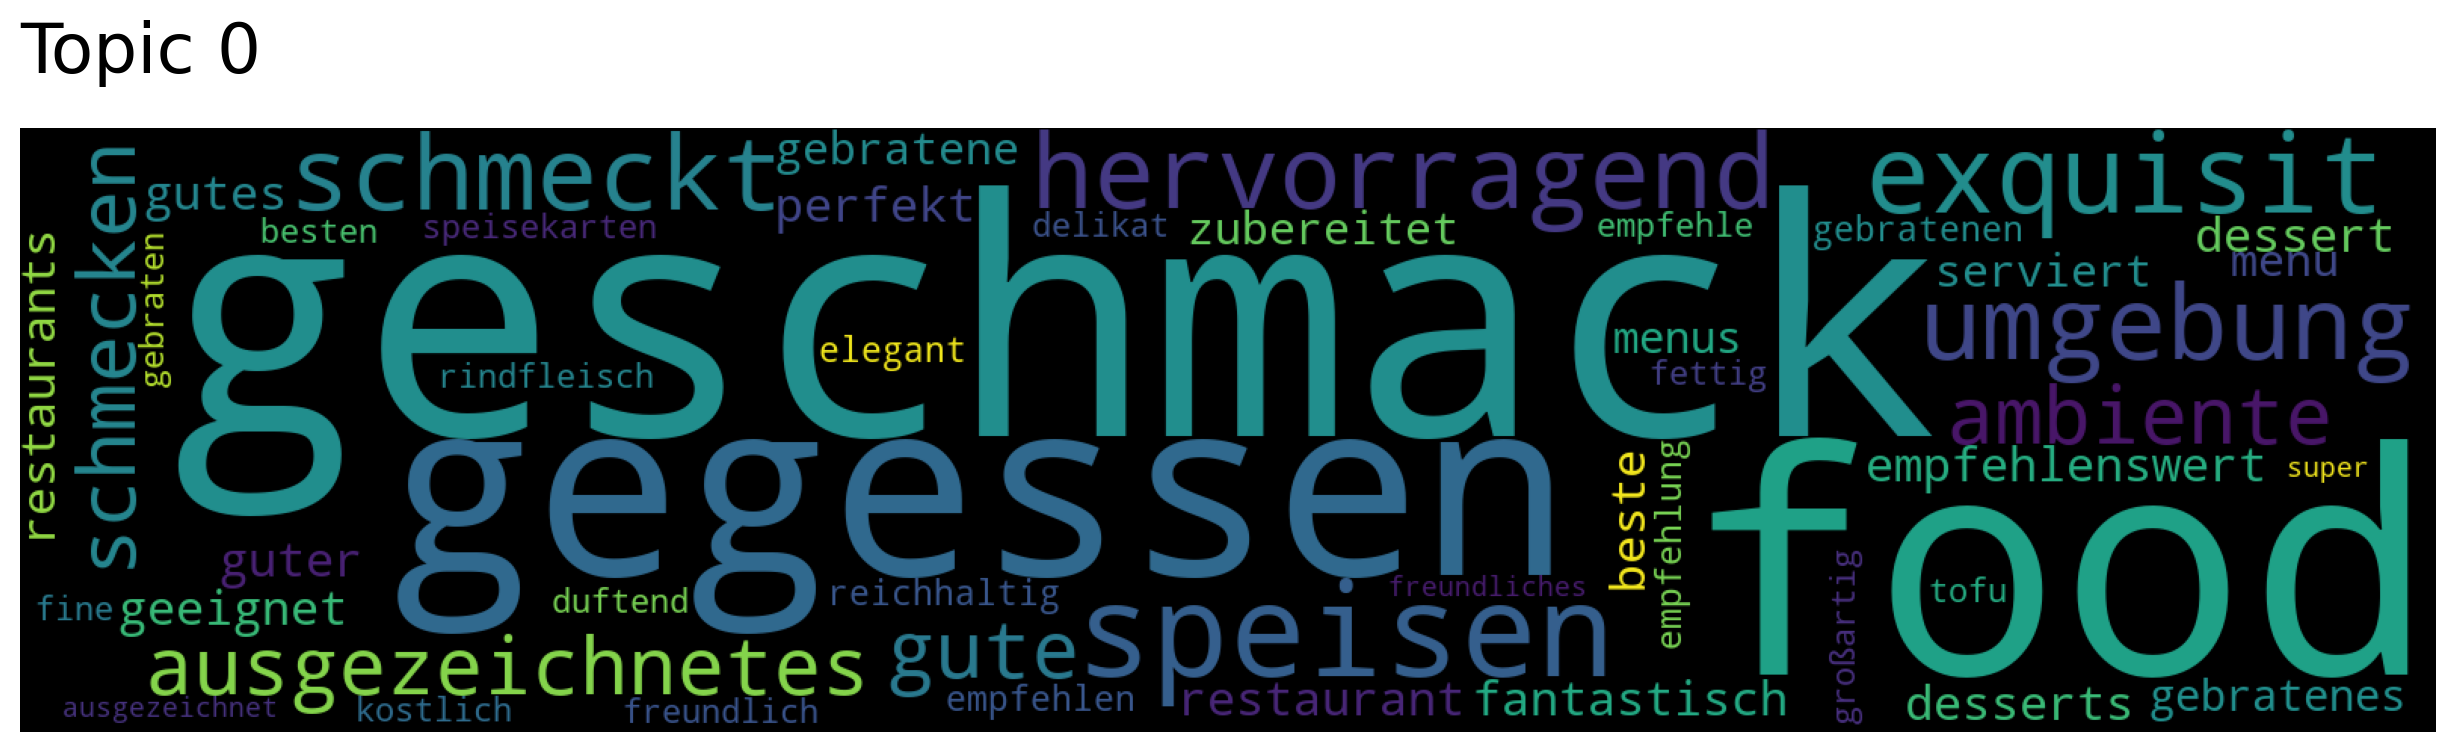

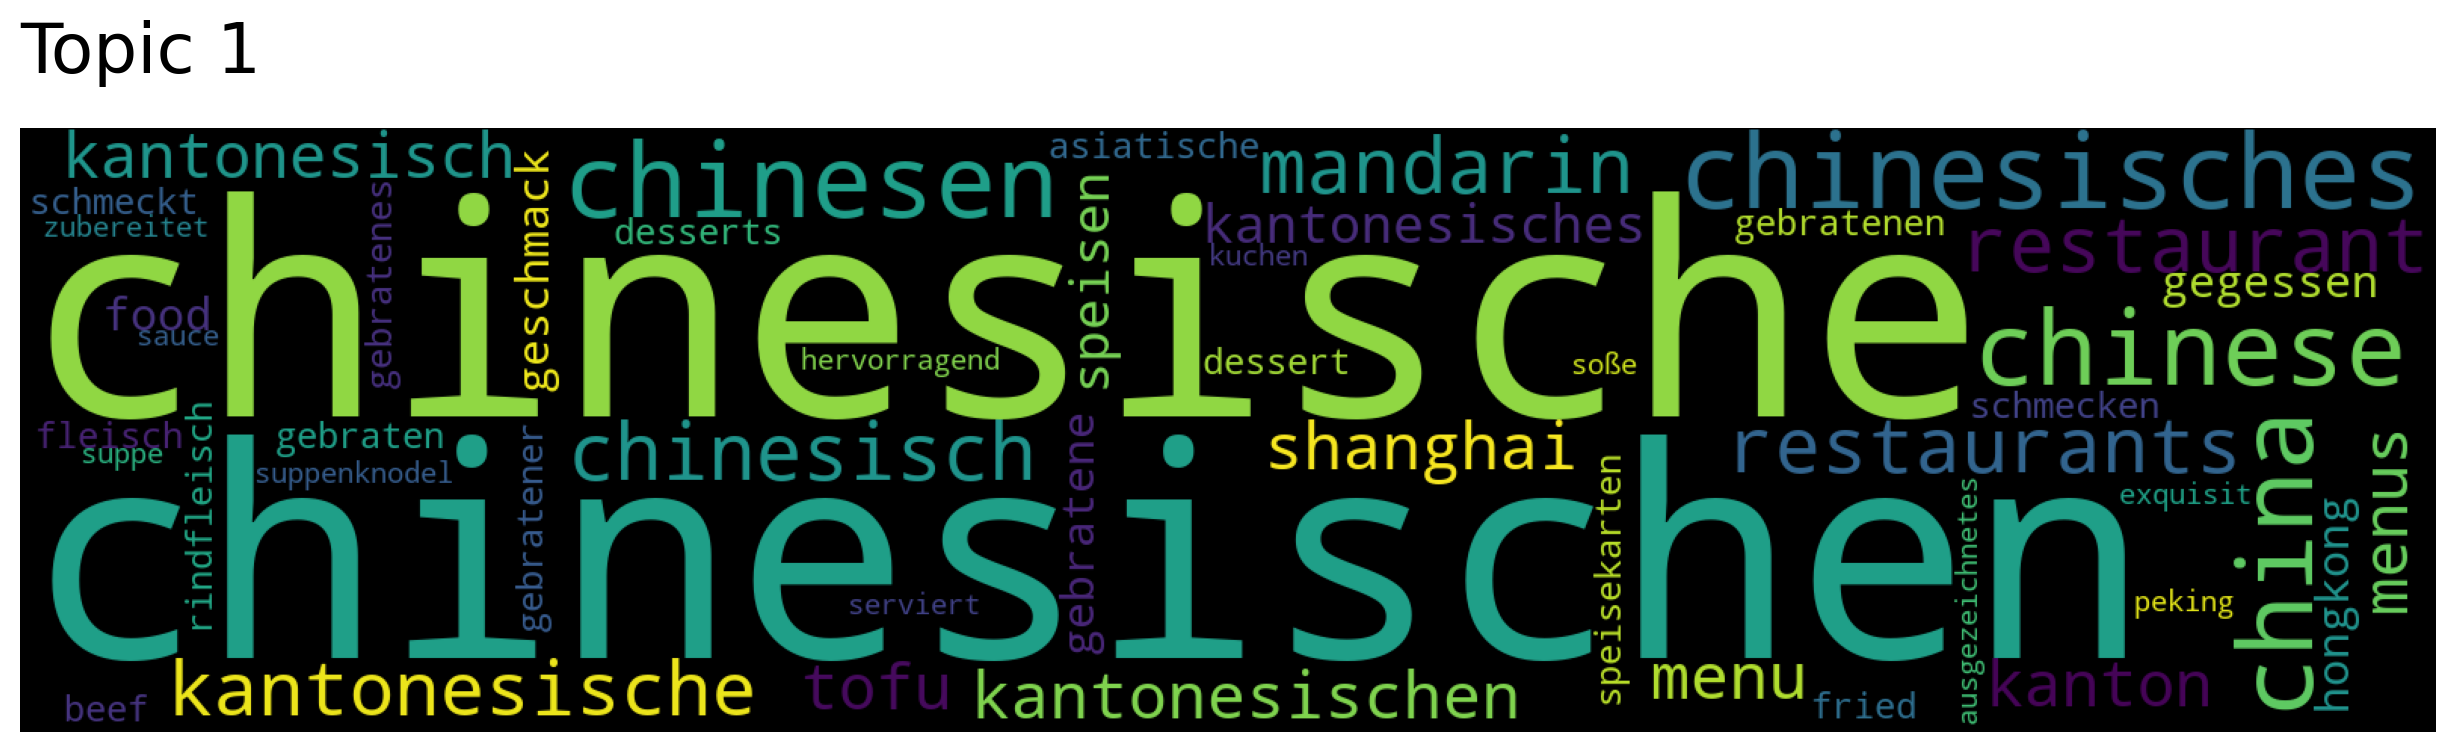

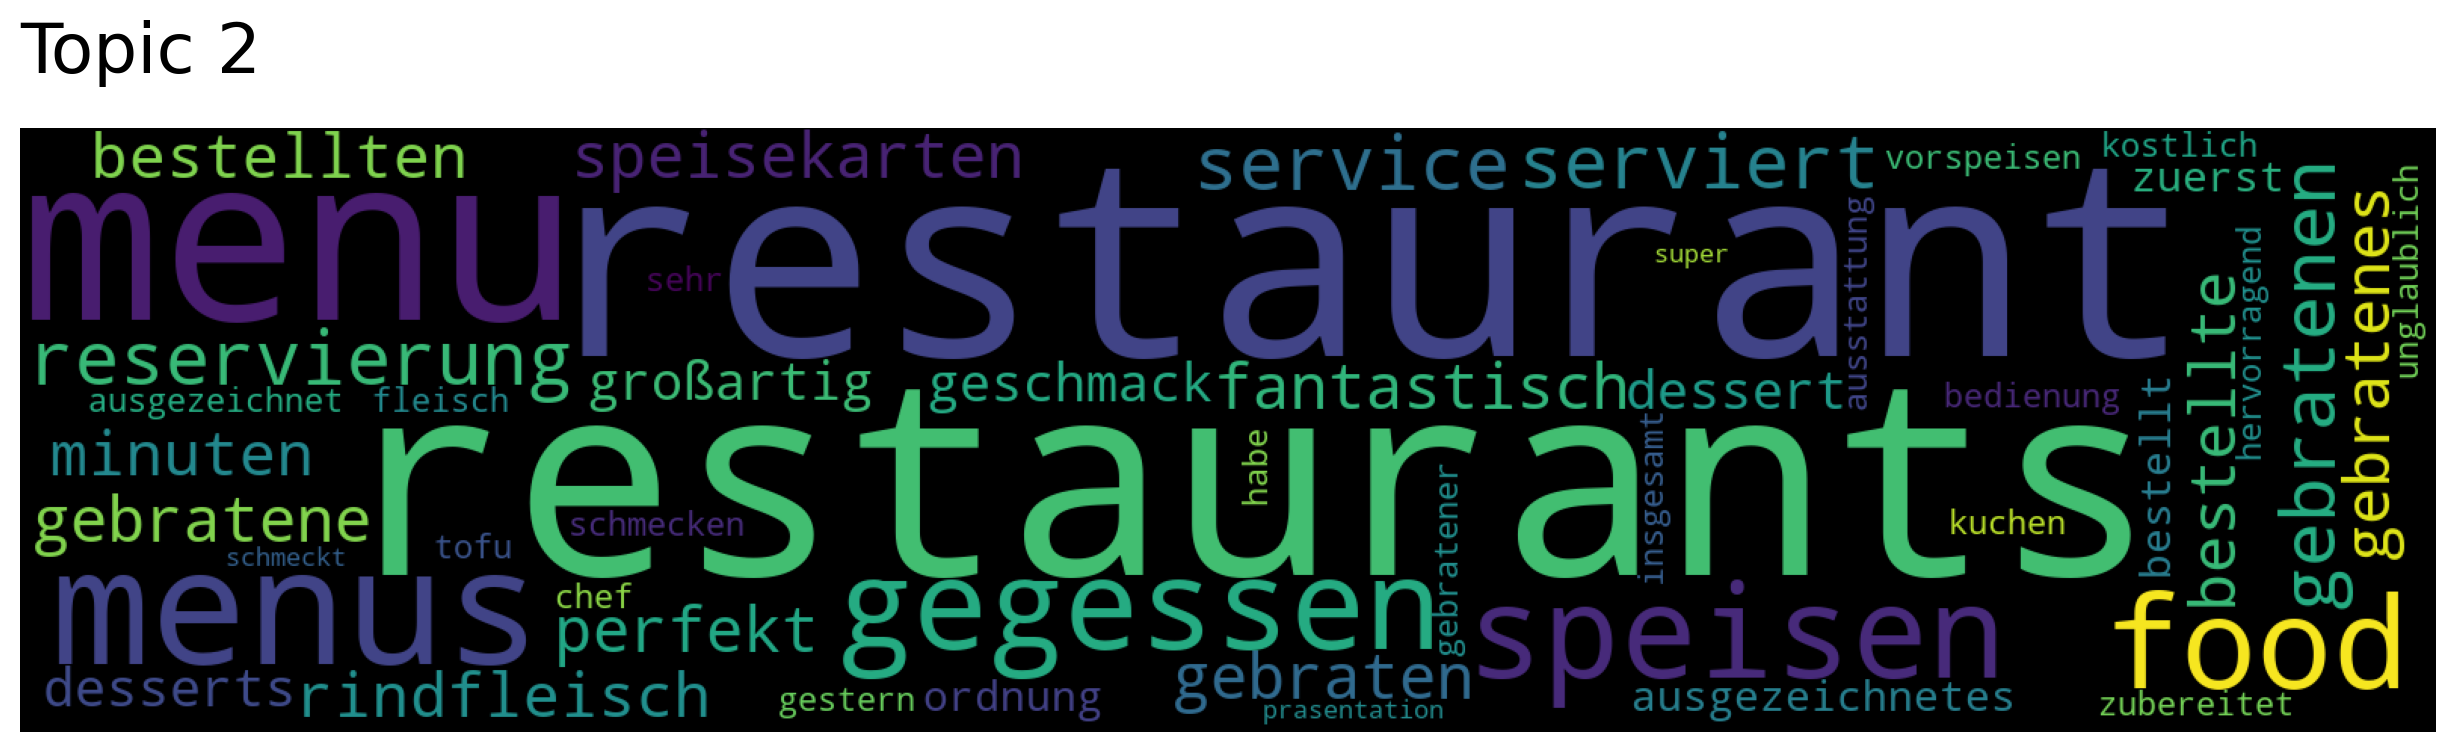

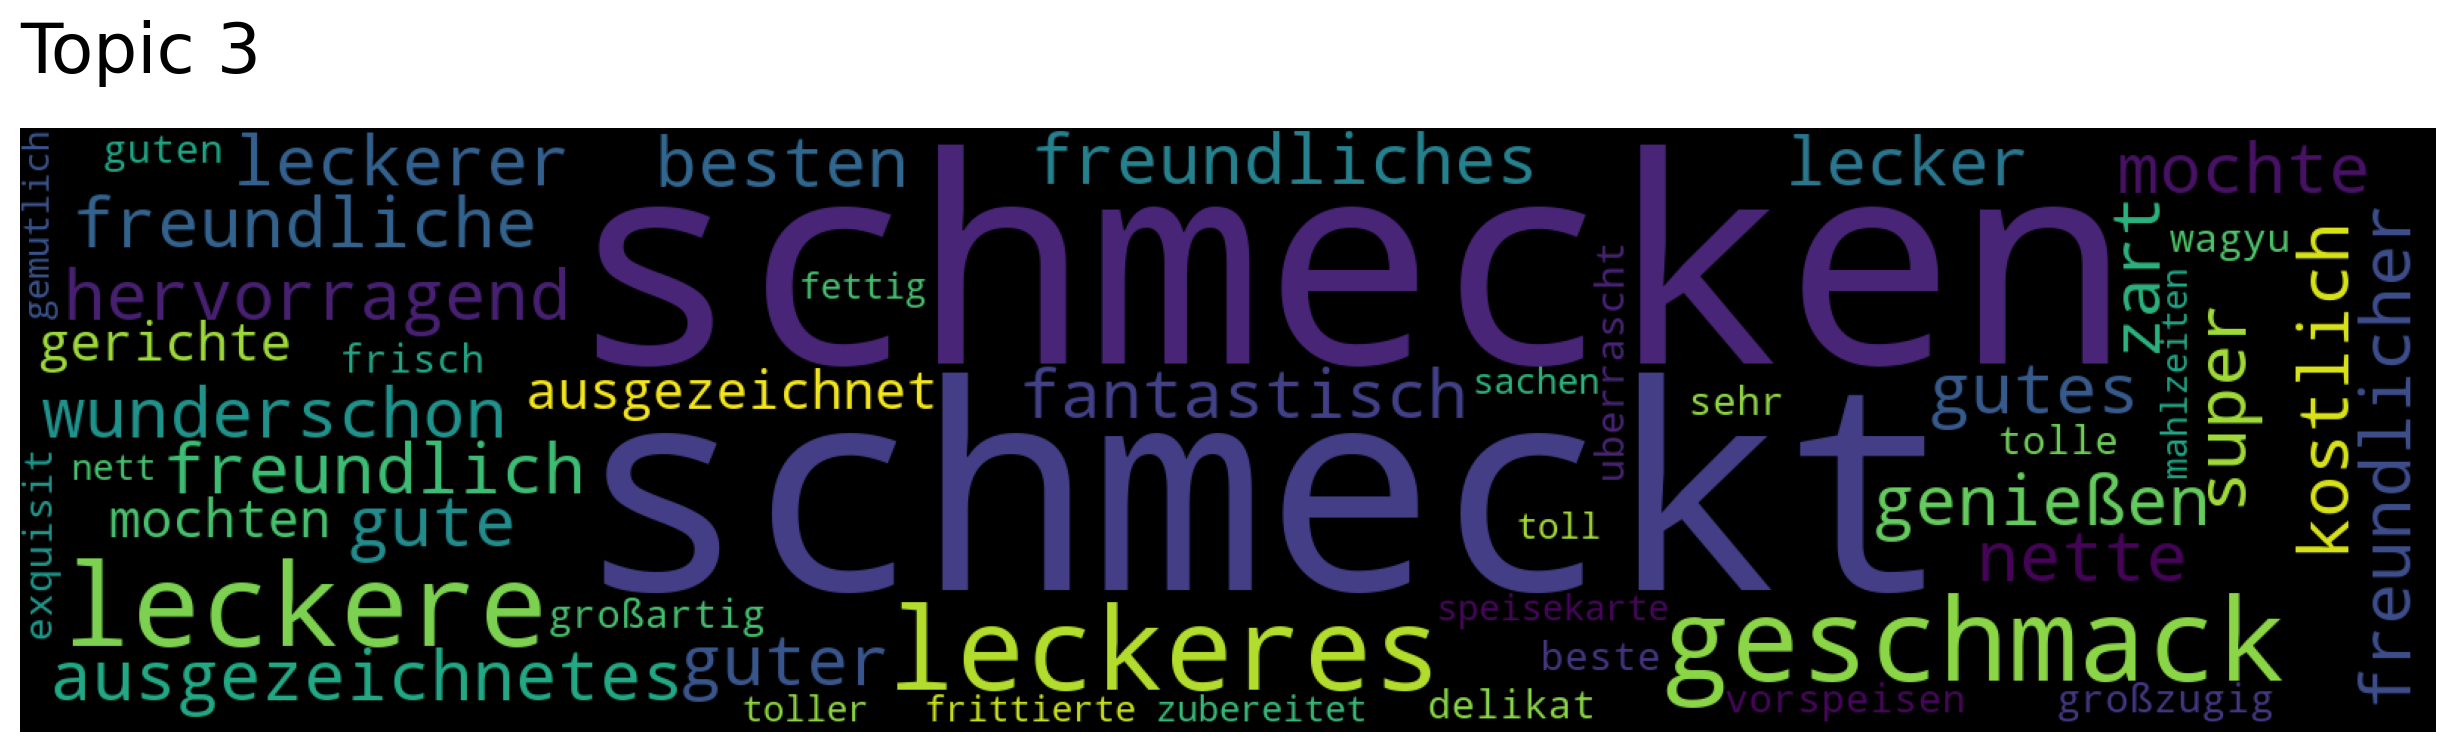

In [10]:
for topic in range(top2vec.get_num_topics()):
    top2vec.generate_topic_wordcloud(topic, background_color="black")

In [11]:
# keywords_select_st = widgets.Label('Enter keywords seperated by space: ')
# display(keywords_select_st)

# keywords_input_st = widgets.Text()
# display(keywords_input_st)

# keywords_neg_select_st = widgets.Label('Enter negative keywords seperated by space: ')
# display(keywords_neg_select_st)

# keywords_neg_input_st = widgets.Text()
# display(keywords_neg_input_st)

# doc_num_select_st = widgets.Label('Choose number of topics: ')
# display(doc_num_select_st)

# doc_num_input_st = widgets.Text(value=f'{top2vec.get_num_topics()}')
# display(doc_num_input_st)

# def display_similar_topics(*args):
    
#     clear_output()
#     display(keywords_select_st)
#     display(keywords_input_st)
#     display(keywords_neg_select_st)
#     display(keywords_neg_input_st)
#     display(doc_num_select_st)
#     display(doc_num_input_st)
#     display(keyword_btn_st)
    
#     try:
#         with out_topic:
#             topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=keywords_input_st.value.split(),num_topics=int(doc_num_input_st.value), keywords_neg=keywords_neg_input_st.value.split())
#             for topic in topic_nums:
#                 top2vec.generate_topic_wordcloud(topic, background_color="black")
        
#     except Exception as e:
#         print(e)
        
# keyword_btn_st = widgets.Button(description="show topics")
# display(keyword_btn_st)
# keyword_btn_st.on_click(display_similar_topics)

# out_topic = widgets.Output()
# display(out_topic)

# Semantic Search

## Search Reviews by Keywords

In [12]:
select_df = topic_df.copy()
n = topic_df.shape[0]

labels = ['review topic'] * n + ['selected topic']
        
keywords_select_kw = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_kw)

keywords_input_kw = widgets.Text()
display(keywords_input_kw)

keywords_neg_select_kw = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_kw)

keywords_neg_input_kw = widgets.Text()
display(keywords_neg_input_kw)

doc_num_select_kw = widgets.Label('Choose number of documents: ')
display(doc_num_select_kw)

doc_num_input_kw = widgets.Text(value='100')
display(doc_num_input_kw)

def display_keywords(*args): 
    try:
        
        with out_topic_comments:
            clear_output()
            
            documents, document_scores, document_nums = top2vec.search_documents_by_keywords(keywords=keywords_input_kw.value.split(), num_docs=int(doc_num_input_kw.value), keywords_neg=keywords_neg_input_kw.value.split())
            df = metadata_df.loc[document_nums]
            df["document_scores"] = document_scores

            select_df.loc[n, 'Rating'] = df.rating.mean()
            select_df['label'] = labels
            select_df.loc[n, 'Topic_words'] = f"Select Topic: {keywords_input_kw.value}"

            print("Selected comments' rating:", df.rating.mean())
            display(px.bar(select_df, x='Topic_words', y='Rating',  
                           color='label',
                           range_y=[3,5]),
                    layout=player_select_widget_container_layout)

            for index,row in df.iterrows():
                print(f"Document: {index}, Score: {round(row.document_scores, 2)}, rating: {row.rating}")
#                 print(f"Title: {row.title}")
                print("-----------")
                print(row.content)
                print("-----------")
                print()
           
    except Exception as e:
        print(e)
        

keyword_btn_kw = widgets.Button(description="show documents")
display(keyword_btn_kw)
keyword_btn_kw.on_click(display_keywords)

out_topic_comments = widgets.Output()
display(out_topic_comments)

Label(value='Enter keywords seperated by space: ')

Text(value='')

Label(value='Enter negative keywords seperated by space: ')

Text(value='')

Label(value='Choose number of documents: ')

Text(value='100')

Button(description='show documents', style=ButtonStyle())

Output()